In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### All the timeseries datafiles 

#### Cold Days 

In [14]:
cold_days_timeseries = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/cold_days_timeseries.nc').squeeze()

In [15]:
cold_days_timeseries

<xarray.Dataset>
Dimensions:                                                         (time: 60)
Coordinates:
  * time                                                            (time) datetime64[ns] ...
    lon                                                             float64 0.0
    lat                                                             float64 0.0
Data variables:
    very_cold_days_percent_wrt_10th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sun Apr 02 07:28:03 2023: cdo -fldmean -mergetime cold_day-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

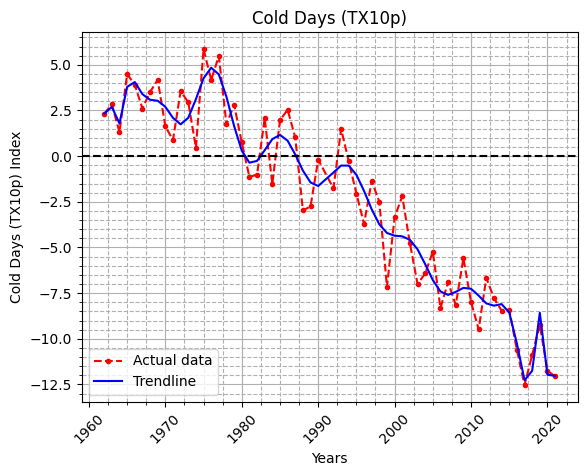

Text(0.05, 0.95, '2.70e+00 x^21 + -1.45e-03 x^20 + -1.21e-06 x^19 + 1.33e-09 x^18 + 1.44e-12 x^17 + -7.46e-16 x^16 + -3.40e-19 x^15 + 2.25e-22 x^14 + -5.15e-28 x^13 + -2.44e-29 x^12 + 6.13e-33 x^11 + -7.94e-39 x^10 + -3.03e-40 x^9 + 7.96e-44 x^8 + -1.16e-47 x^7 + 1.12e-51 x^6 + -7.65e-56 x^5 + 3.69e-60 x^4 + -1.24e-64 x^3 + 2.79e-69 x^2 + -3.75e-74 x^1 + 2.29e-79')

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = cold_days_timeseries['very_cold_days_percent_wrt_10th_percentile_of_reference_period'].mean().item()
data_std = cold_days_timeseries['very_cold_days_percent_wrt_10th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = cold_days_timeseries.where((cold_days_timeseries['very_cold_days_percent_wrt_10th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (cold_days_timeseries['very_cold_days_percent_wrt_10th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['very_cold_days_percent_wrt_10th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['very_cold_days_percent_wrt_10th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['very_cold_days_percent_wrt_10th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Cold Days (TX10p) Index')
ax.set_title('Cold Days (TX10p)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


#### Warm Days 

In [18]:
warm_days_timeseries = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/warm_days_timeseries.nc').squeeze()

In [19]:
warm_days_timeseries

<xarray.Dataset>
Dimensions:                                                         (time: 60)
Coordinates:
  * time                                                            (time) datetime64[ns] ...
    lon                                                             float64 0.0
    lat                                                             float64 0.0
Data variables:
    very_warm_days_percent_wrt_90th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sun Apr 02 07:28:39 2023: cdo -fldmean -mergetime warm_day-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

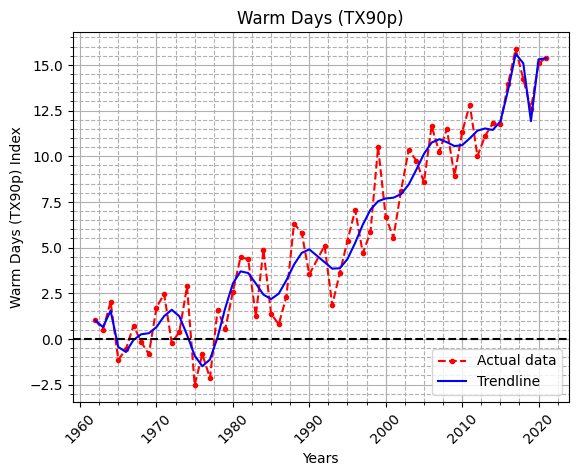

Text(0.05, 0.95, '6.45e-01 x^21 + 1.44e-03 x^20 + 1.18e-06 x^19 + -1.32e-09 x^18 + -1.42e-12 x^17 + 7.38e-16 x^16 + 3.37e-19 x^15 + -2.23e-22 x^14 + 4.12e-28 x^13 + 2.42e-29 x^12 + -6.06e-33 x^11 + 6.37e-39 x^10 + 3.00e-40 x^9 + -7.88e-44 x^8 + 1.15e-47 x^7 + -1.11e-51 x^6 + 7.58e-56 x^5 + -3.66e-60 x^4 + 1.23e-64 x^3 + -2.76e-69 x^2 + 3.72e-74 x^1 + -2.27e-79')

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = warm_days_timeseries['very_warm_days_percent_wrt_90th_percentile_of_reference_period'].mean().item()
data_std = warm_days_timeseries['very_warm_days_percent_wrt_90th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = warm_days_timeseries.where((warm_days_timeseries['very_warm_days_percent_wrt_90th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (warm_days_timeseries['very_warm_days_percent_wrt_90th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['very_warm_days_percent_wrt_90th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['very_warm_days_percent_wrt_90th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['very_warm_days_percent_wrt_90th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Warm Days (TX90p) Index')
ax.set_title('Warm Days (TX90p)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


Warm Nights 

In [22]:
warm_nights_timeseries = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/warm_nights_timeseries.nc').squeeze()
warm_nights_timeseries

<xarray.Dataset>
Dimensions:                                                      (time: 60)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    warm_nights_percent_wrt_90th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Apr 02 08:37:25 2023: cdo fldmean warm_nights_timeserie...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

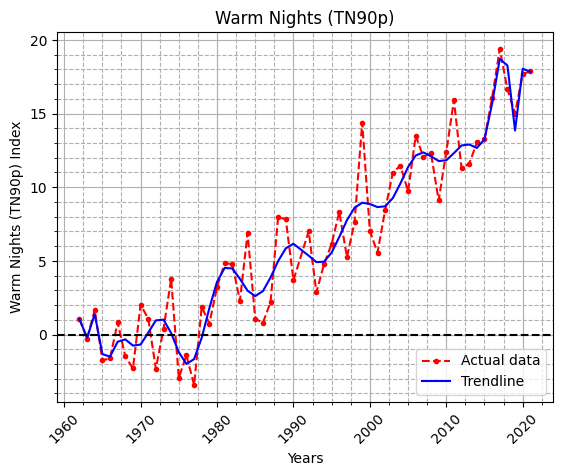

Text(0.05, 0.95, '-6.78e-01 x^21 + 1.36e-03 x^20 + 3.09e-06 x^19 + -1.34e-09 x^18 + -2.62e-12 x^17 + 9.84e-16 x^16 + 5.98e-19 x^15 + -3.30e-22 x^14 + -8.78e-27 x^13 + 3.75e-29 x^12 + -8.78e-33 x^11 + -1.07e-37 x^10 + 4.62e-40 x^9 + -1.18e-43 x^8 + 1.69e-47 x^7 + -1.62e-51 x^6 + 1.10e-55 x^5 + -5.27e-60 x^4 + 1.77e-64 x^3 + -3.96e-69 x^2 + 5.31e-74 x^1 + -3.23e-79')

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = warm_nights_timeseries['warm_nights_percent_wrt_90th_percentile_of_reference_period'].mean().item()
data_std = warm_nights_timeseries['warm_nights_percent_wrt_90th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = warm_nights_timeseries.where((warm_nights_timeseries['warm_nights_percent_wrt_90th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (warm_nights_timeseries['warm_nights_percent_wrt_90th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Warm Nights (TN90p) Index')
ax.set_title('Warm Nights (TN90p)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


Cold Nights 

In [25]:
cold_nights_timeseries = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/cold_nights_timeseries.nc').squeeze()
cold_nights_timeseries

<xarray.Dataset>
Dimensions:                                                      (time: 60)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    cold_nights_percent_wrt_10th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sun Apr 02 07:44:38 2023: cdo -fldmean -mergetime cold_nigh...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

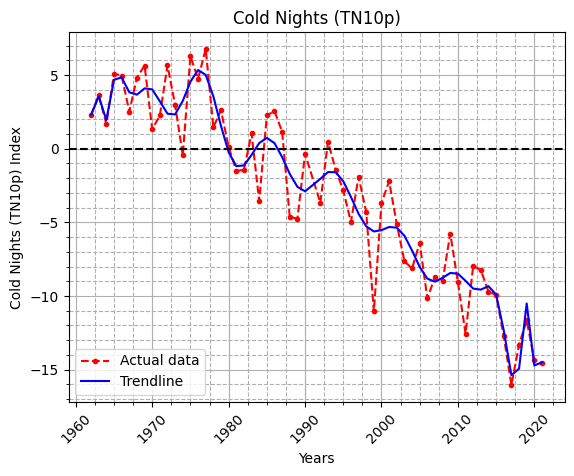

Text(0.05, 0.95, '4.02e+00 x^21 + -1.37e-03 x^20 + -3.12e-06 x^19 + 1.35e-09 x^18 + 2.63e-12 x^17 + -9.92e-16 x^16 + -6.01e-19 x^15 + 3.32e-22 x^14 + 8.68e-27 x^13 + -3.78e-29 x^12 + 8.85e-33 x^11 + 1.05e-37 x^10 + -4.65e-40 x^9 + 1.18e-43 x^8 + -1.70e-47 x^7 + 1.63e-51 x^6 + -1.10e-55 x^5 + 5.31e-60 x^4 + -1.78e-64 x^3 + 3.99e-69 x^2 + -5.35e-74 x^1 + 3.26e-79')

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'].mean().item()
data_std = cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = cold_nights_timeseries.where((cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (cold_nights_timeseries['cold_nights_percent_wrt_10th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Cold Nights (TN10p) Index')
ax.set_title('Cold Nights (TN10p)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


Seasonal change in warm nights 

In [27]:
## djf season 

warm_nights_timeseries_djf = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/djf.tn90p.hist.nc').squeeze()
warm_nights_timeseries_djf

<xarray.Dataset>
Dimensions:                                                      (time: 61)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    warm_nights_percent_wrt_90th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Apr 13 23:38:43 2023: cdo -fldsum eca_tn90p.djf.year.nc...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

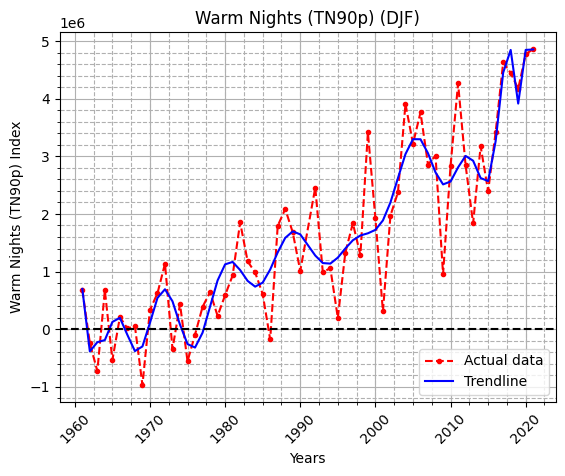

Text(0.05, 0.95, '1.12e+05 x^21 + 1.32e+03 x^20 + 6.48e-02 x^19 + -1.30e-03 x^18 + 6.81e-08 x^17 + 4.13e-10 x^16 + -7.50e-14 x^15 + -5.09e-17 x^14 + 1.76e-20 x^13 + 1.05e-24 x^12 + -1.40e-27 x^11 + 2.32e-31 x^10 + 9.82e-36 x^9 + -9.92e-39 x^8 + 1.92e-42 x^7 + -2.15e-46 x^6 + 1.61e-50 x^5 + -8.36e-55 x^4 + 2.98e-59 x^3 + -6.98e-64 x^2 + 9.75e-69 x^1 + -6.14e-74')

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = warm_nights_timeseries_djf['warm_nights_percent_wrt_90th_percentile_of_reference_period'].mean().item()
data_std = warm_nights_timeseries_djf['warm_nights_percent_wrt_90th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = warm_nights_timeseries_djf.where((warm_nights_timeseries_djf['warm_nights_percent_wrt_90th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (warm_nights_timeseries_djf['warm_nights_percent_wrt_90th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Warm Nights (TN90p) Index')
ax.set_title('Warm Nights (TN90p) (DJF)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


In [29]:
## mam season 

warm_nights_timeseries_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/mam.tn90p.hist.nc').squeeze()
warm_nights_timeseries_mam

<xarray.Dataset>
Dimensions:                                                      (time: 61)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    warm_nights_percent_wrt_90th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Apr 13 23:21:18 2023: cdo -fldsum eca_tn90p.mam.year.nc...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

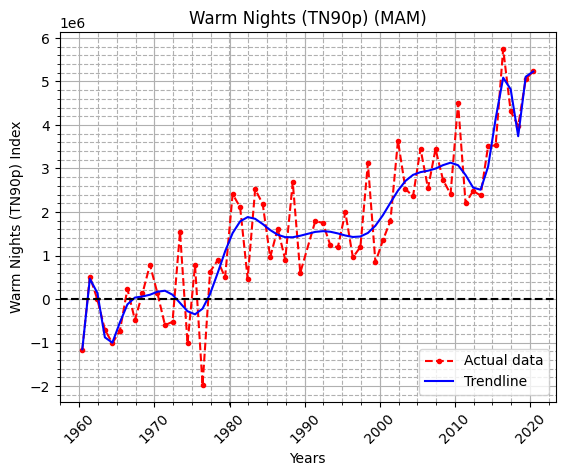

Text(0.05, 0.95, '1.40e+05 x^21 + 2.01e+02 x^20 + -3.11e-02 x^19 + -3.30e-04 x^18 + -7.08e-08 x^17 + 1.65e-10 x^16 + -1.02e-14 x^15 + -2.56e-17 x^14 + 6.64e-21 x^13 + 7.56e-25 x^12 + -5.97e-28 x^11 + 9.23e-32 x^10 + 3.62e-36 x^9 + -3.71e-39 x^8 + 7.14e-43 x^7 + -8.04e-47 x^6 + 6.08e-51 x^5 + -3.19e-55 x^4 + 1.16e-59 x^3 + -2.77e-64 x^2 + 3.96e-69 x^1 + -2.56e-74')

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = warm_nights_timeseries_mam['warm_nights_percent_wrt_90th_percentile_of_reference_period'].mean().item()
data_std = warm_nights_timeseries_mam['warm_nights_percent_wrt_90th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = warm_nights_timeseries_mam.where((warm_nights_timeseries_mam['warm_nights_percent_wrt_90th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (warm_nights_timeseries_mam['warm_nights_percent_wrt_90th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Warm Nights (TN90p) Index')
ax.set_title('Warm Nights (TN90p) (MAM)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


In [31]:
## jja season 

warm_nights_timeseries_jja = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/jja.tn90p.hist.nc').squeeze()
warm_nights_timeseries_jja

<xarray.Dataset>
Dimensions:                                                      (time: 61)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    warm_nights_percent_wrt_90th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Apr 13 23:55:28 2023: cdo -fldsum eca_tn90p.jja.year.nc...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

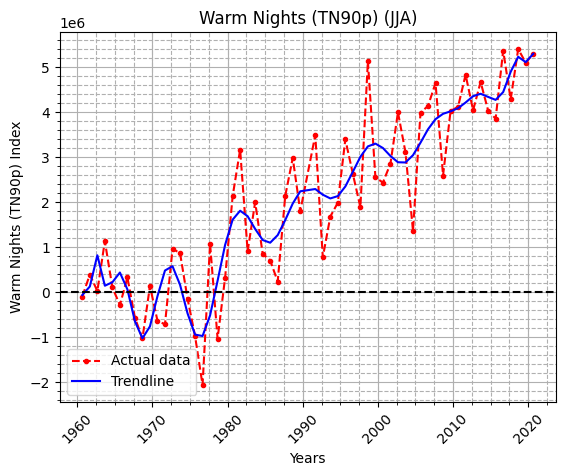

Text(0.05, 0.95, '-5.56e+05 x^21 + 1.80e+03 x^20 + 9.54e-01 x^19 + -1.87e-03 x^18 + -2.83e-07 x^17 + 6.08e-10 x^16 + -3.47e-14 x^15 + -8.21e-17 x^14 + 1.89e-20 x^13 + 2.99e-24 x^12 + -1.80e-27 x^11 + 2.26e-31 x^10 + 2.24e-35 x^9 + -1.19e-38 x^8 + 2.02e-42 x^7 + -2.09e-46 x^6 + 1.46e-50 x^5 + -7.15e-55 x^4 + 2.41e-59 x^3 + -5.39e-64 x^2 + 7.18e-69 x^1 + -4.33e-74')

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = warm_nights_timeseries_jja['warm_nights_percent_wrt_90th_percentile_of_reference_period'].mean().item()
data_std = warm_nights_timeseries_jja['warm_nights_percent_wrt_90th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = warm_nights_timeseries_jja.where((warm_nights_timeseries_jja['warm_nights_percent_wrt_90th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (warm_nights_timeseries_jja['warm_nights_percent_wrt_90th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Warm Nights (TN90p) Index')
ax.set_title('Warm Nights (TN90p) (JJA)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


In [33]:
## son season 

warm_nights_timeseries_son = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/son.tn90p.hist.nc').squeeze()
warm_nights_timeseries_son

<xarray.Dataset>
Dimensions:                                                      (time: 61)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    warm_nights_percent_wrt_90th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 14 00:16:30 2023: cdo -fldsum eca_tn90p.son.year.nc...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

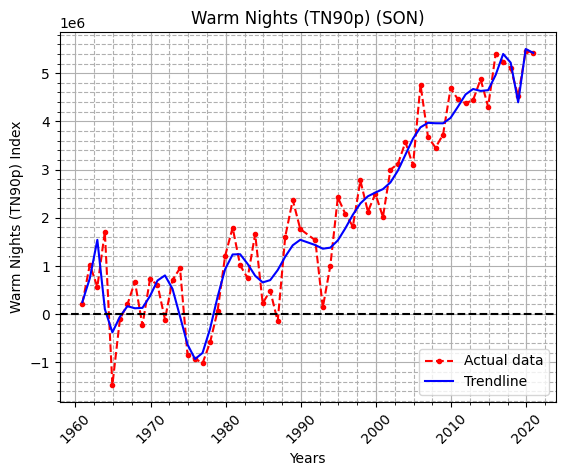

Text(0.05, 0.95, '4.02e+05 x^21 + 9.27e+02 x^20 + 2.51e-01 x^19 + -1.08e-03 x^18 + -2.94e-07 x^17 + 4.46e-10 x^16 + 1.20e-14 x^15 + -7.98e-17 x^14 + 1.47e-20 x^13 + 4.24e-24 x^12 + -1.97e-27 x^11 + 2.11e-31 x^10 + 3.65e-35 x^9 + -1.55e-38 x^8 + 2.60e-42 x^7 + -2.71e-46 x^6 + 1.93e-50 x^5 + -9.59e-55 x^4 + 3.31e-59 x^3 + -7.56e-64 x^2 + 1.03e-68 x^1 + -6.37e-74')

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = warm_nights_timeseries_son['warm_nights_percent_wrt_90th_percentile_of_reference_period'].mean().item()
data_std = warm_nights_timeseries_son['warm_nights_percent_wrt_90th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = warm_nights_timeseries_son.where((warm_nights_timeseries_son['warm_nights_percent_wrt_90th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (warm_nights_timeseries_son['warm_nights_percent_wrt_90th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['warm_nights_percent_wrt_90th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Warm Nights (TN90p) Index')
ax.set_title('Warm Nights (TN90p) (SON)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


Seasonal change in cold nights

In [35]:
## djf season

cold_nights_timeseries_djf = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/djf.tn10p.hist.nc').squeeze()
cold_nights_timeseries_djf

<xarray.Dataset>
Dimensions:                                                      (time: 61)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    cold_nights_percent_wrt_10th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Apr 13 20:06:31 2023: cdo -fldsum eca_tn10p.djf.year.nc...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

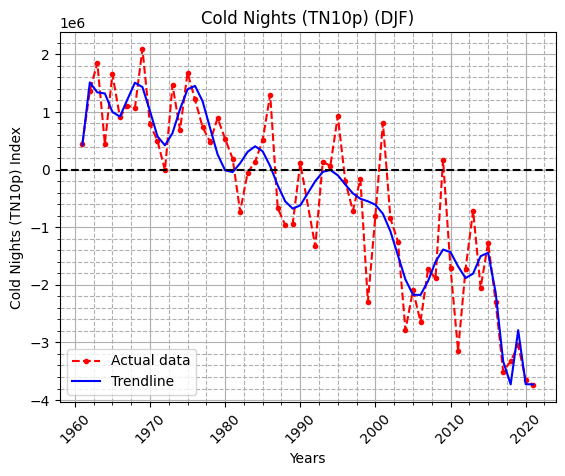

Text(0.05, 0.95, '1.02e+06 x^21 + -1.34e+03 x^20 + -8.19e-02 x^19 + 1.33e-03 x^18 + -6.13e-08 x^17 + -4.27e-10 x^16 + 7.58e-14 x^15 + 5.32e-17 x^14 + -1.82e-20 x^13 + -1.15e-24 x^12 + 1.46e-27 x^11 + -2.40e-31 x^10 + -1.07e-35 x^9 + 1.04e-38 x^8 + -2.00e-42 x^7 + 2.24e-46 x^6 + -1.67e-50 x^5 + 8.67e-55 x^4 + -3.08e-59 x^3 + 7.22e-64 x^2 + -1.01e-68 x^1 + 6.34e-74')

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = cold_nights_timeseries_djf['cold_nights_percent_wrt_10th_percentile_of_reference_period'].mean().item()
data_std = cold_nights_timeseries_djf['cold_nights_percent_wrt_10th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = cold_nights_timeseries_djf.where((cold_nights_timeseries_djf['cold_nights_percent_wrt_10th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (cold_nights_timeseries_djf['cold_nights_percent_wrt_10th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Cold Nights (TN10p) Index')
ax.set_title('Cold Nights (TN10p) (DJF)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


In [37]:
## mam season 

cold_nights_timeseries_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/mam.tn10p.hist.nc').squeeze()
cold_nights_timeseries_mam

<xarray.Dataset>
Dimensions:                                                      (time: 61)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    cold_nights_percent_wrt_10th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Apr 13 20:47:32 2023: cdo -fldsum eca_tn10p.mam.year.nc...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

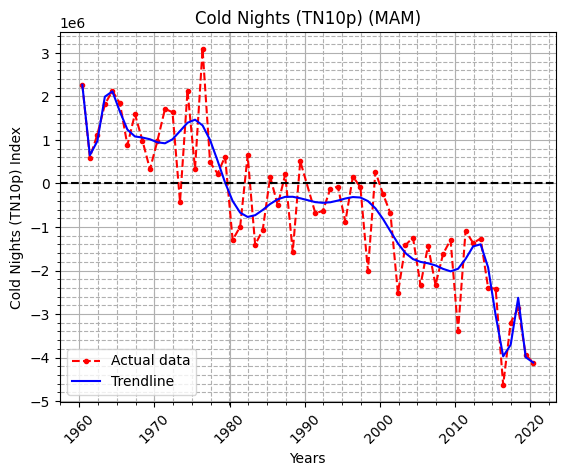

Text(0.05, 0.95, '9.75e+05 x^21 + -2.01e+02 x^20 + 3.11e-02 x^19 + 3.30e-04 x^18 + 7.08e-08 x^17 + -1.65e-10 x^16 + 1.02e-14 x^15 + 2.56e-17 x^14 + -6.64e-21 x^13 + -7.56e-25 x^12 + 5.97e-28 x^11 + -9.23e-32 x^10 + -3.62e-36 x^9 + 3.71e-39 x^8 + -7.14e-43 x^7 + 8.04e-47 x^6 + -6.08e-51 x^5 + 3.19e-55 x^4 + -1.16e-59 x^3 + 2.77e-64 x^2 + -3.96e-69 x^1 + 2.56e-74')

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = cold_nights_timeseries_mam['cold_nights_percent_wrt_10th_percentile_of_reference_period'].mean().item()
data_std = cold_nights_timeseries_mam['cold_nights_percent_wrt_10th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = cold_nights_timeseries_mam.where((cold_nights_timeseries_mam['cold_nights_percent_wrt_10th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (cold_nights_timeseries_mam['cold_nights_percent_wrt_10th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Cold Nights (TN10p) Index')
ax.set_title('Cold Nights (TN10p) (MAM)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


In [39]:
## jja season 

cold_nights_timeseries_jja = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/jja.tn10p.hist.nc').squeeze()
cold_nights_timeseries_jja

<xarray.Dataset>
Dimensions:                                                      (time: 61)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    cold_nights_percent_wrt_10th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 14 00:48:50 2023: cdo -fldsum eca_tn10p.jja.year.nc...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

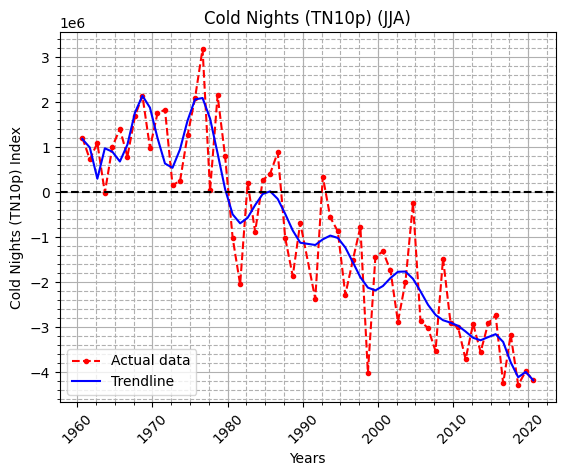

Text(0.05, 0.95, '1.67e+06 x^21 + -1.80e+03 x^20 + -9.54e-01 x^19 + 1.87e-03 x^18 + 2.83e-07 x^17 + -6.08e-10 x^16 + 3.47e-14 x^15 + 8.21e-17 x^14 + -1.89e-20 x^13 + -2.99e-24 x^12 + 1.80e-27 x^11 + -2.26e-31 x^10 + -2.24e-35 x^9 + 1.19e-38 x^8 + -2.02e-42 x^7 + 2.09e-46 x^6 + -1.46e-50 x^5 + 7.15e-55 x^4 + -2.41e-59 x^3 + 5.39e-64 x^2 + -7.18e-69 x^1 + 4.33e-74')

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = cold_nights_timeseries_jja['cold_nights_percent_wrt_10th_percentile_of_reference_period'].mean().item()
data_std = cold_nights_timeseries_jja['cold_nights_percent_wrt_10th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = cold_nights_timeseries_jja.where((cold_nights_timeseries_jja['cold_nights_percent_wrt_10th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (cold_nights_timeseries_jja['cold_nights_percent_wrt_10th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Cold Nights (TN10p) Index')
ax.set_title('Cold Nights (TN10p) (JJA)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))


In [41]:
## son season 

cold_nights_timeseries_son = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_indices/datasets/son.tn10p.hist.nc').squeeze()
cold_nights_timeseries_son

<xarray.Dataset>
Dimensions:                                                      (time: 61)
Coordinates:
  * time                                                         (time) datetime64[ns] ...
    lon                                                          float64 0.0
    lat                                                          float64 0.0
Data variables:
    cold_nights_percent_wrt_10th_percentile_of_reference_period  (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 14 00:32:05 2023: cdo -fldsum eca_tn10p.son.year.nc...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

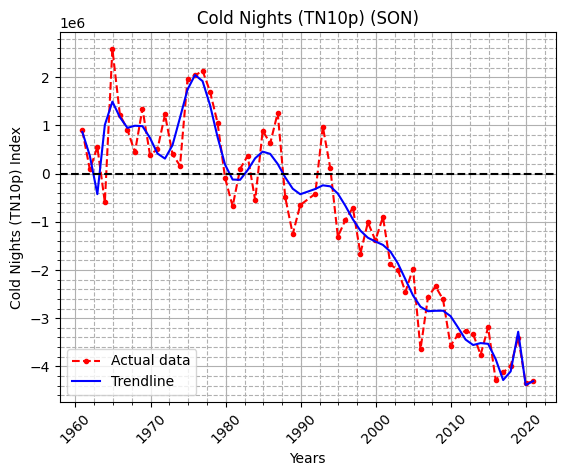

Text(0.05, 0.95, '7.13e+05 x^21 + -9.27e+02 x^20 + -2.51e-01 x^19 + 1.08e-03 x^18 + 2.94e-07 x^17 + -4.46e-10 x^16 + -1.20e-14 x^15 + 7.98e-17 x^14 + -1.47e-20 x^13 + -4.24e-24 x^12 + 1.97e-27 x^11 + -2.11e-31 x^10 + -3.65e-35 x^9 + 1.55e-38 x^8 + -2.60e-42 x^7 + 2.71e-46 x^6 + -1.93e-50 x^5 + 9.59e-55 x^4 + -3.31e-59 x^3 + 7.56e-64 x^2 + -1.03e-68 x^1 + 6.37e-74')

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Calculate the mean and standard deviation of the data
data_mean = cold_nights_timeseries_son['cold_nights_percent_wrt_10th_percentile_of_reference_period'].mean().item()
data_std = cold_nights_timeseries_son['cold_nights_percent_wrt_10th_percentile_of_reference_period'].std().item()

# Filter out points that are more than 3 standard deviations away from the mean
filtered_data = cold_nights_timeseries_son.where((cold_nights_timeseries_son['cold_nights_percent_wrt_10th_percentile_of_reference_period'] >= data_mean - 3*data_std) & (cold_nights_timeseries_son['cold_nights_percent_wrt_10th_percentile_of_reference_period'] <= data_mean + 3*data_std), drop=True)

# Convert datetime values to numeric values
x = date2num(filtered_data['time'].values)

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'].max()
fig, ax = plt.subplots()
ax.plot(filtered_data['time'], filtered_data['cold_nights_percent_wrt_10th_percentile_of_reference_period'], 'r.--', label='Actual data')
ax.plot(filtered_data['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=0, color='black', linestyle='--')
ax.bar(filtered_data['time'], [max_height]*len(filtered_data), alpha=0.3, width=1)
ax.set_xlabel('Years')
ax.set_ylabel('Cold Nights (TN10p) Index')
ax.set_title('Cold Nights (TN10p) (SON)')
ax.legend()

# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

# Show the plot
# plt.savefig('/home/shiv/Documents/GitHub/EES405/clim_extreme/plots_clim_extreme/cold_days_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Show the trendline equation as a text box
equation = f'{"{:.2e}".format(p[-1])} x^{len(p)-1}'
for i in range(len(p)-2, 0, -1):
    equation += f' + {"{:.2e}".format(p[i])} x^{i}'
equation += f' + {"{:.2e}".format(p[0])}'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.8))
